In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from itertools import zip_longest

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results, get_experiment_details, average_scores_over_seeds
from dogo.plot_results import plot_grouped_evaluation_returns

In [3]:
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.rc('font', size=12)

In [4]:
##########
# Dynamics
##########

# 0.1M Records
MP497 = get_results("MP497")
MP498 = get_results("MP498")
MP499 = get_results("MP499")

# 0.2M Records
MP500 = get_results("MP500")
MP501 = get_results("MP501")
MP502 = get_results("MP502")

# 0.5M Records
MP503 = get_results("MP503")
MP504 = get_results("MP504")
MP505 = get_results("MP505")

# 1M Records
MP506 = get_results("MP506")
MP507 = get_results("MP507")
MP508 = get_results("MP508")

# 2M Records
MP539 = get_results("MP539")
MP540 = get_results("MP540")
MP541 = get_results("MP541")

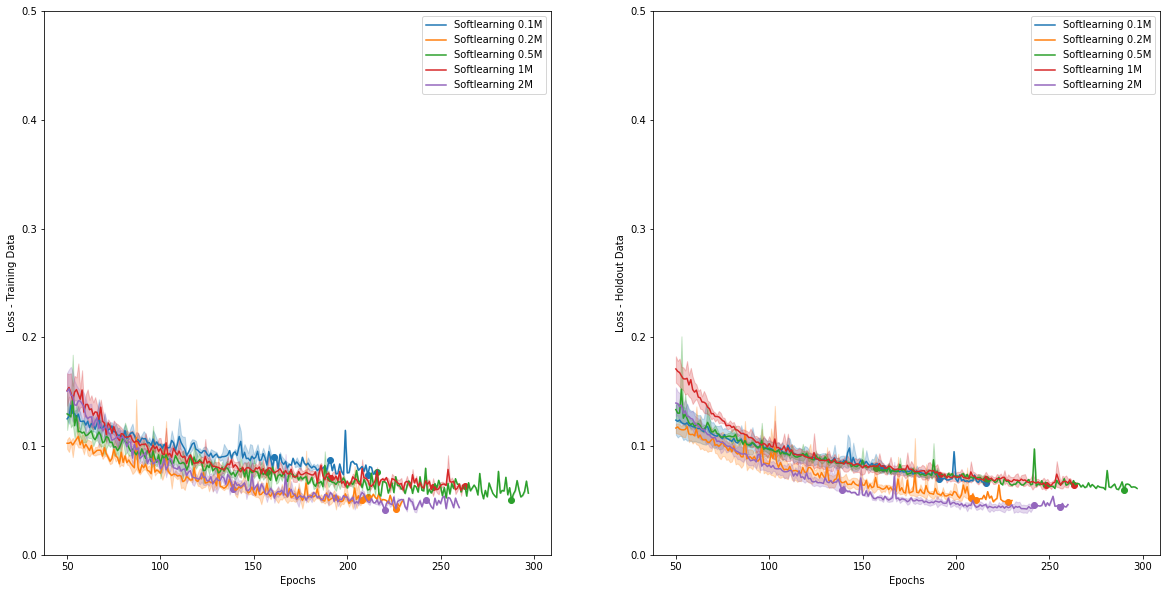

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

starting_epoch = 50
for i, metric in enumerate(['model_loss_history', 'model_holdout_loss_history']):
    for j, (exp_set, legend_label) in enumerate([
        ((MP497, MP498, MP499), 'Softlearning 0.1M'),
        ((MP500, MP501, MP502), 'Softlearning 0.2M'),
        ((MP503, MP504, MP505), 'Softlearning 0.5M'),
        ((MP506, MP507, MP508), 'Softlearning 1M'),
        ((MP539, MP540, MP541), 'Softlearning 2M'),
    ]):
        comb_arr= np.vstack(list(zip_longest(*[
            getattr(exp.dynamics, metric).mean(axis=1).values for exp in exp_set
            ],
            fillvalue=np.NaN
        )))[starting_epoch:]
        mean_arr = np.nanmean(comb_arr, axis=-1)
        min_arr = np.nanmin(comb_arr, axis=-1)
        max_arr = np.nanmax(comb_arr, axis=-1)
        x_vals = np.arange(len(mean_arr)) + 50

        ax[i].plot(x_vals, mean_arr, c=cols[j], label=legend_label)
        ax[i].fill_between(x_vals, min_arr, max_arr, color=cols[j], alpha=0.25)

        terminal_points = comb_arr.argmin(axis=0)
        ax[i].scatter(x_vals[terminal_points], mean_arr[terminal_points], color=cols[j])

    ax[i].set_xlabel('Epochs')
    ax[i].set_ylim(0,0.5)
    ax[i].legend()

ax[0].set_ylabel('Loss - Training Data')
ax[1].set_ylabel('Loss - Holdout Data')

pass

In [6]:
######
# MOPO
######

# 0.1M Records
MP509 = get_results("MP509")
MP510 = get_results("MP510")
MP511 = get_results("MP511")

# 0.2M Records
MP512 = get_results("MP512")
MP513 = get_results("MP513")
MP514 = get_results("MP514")

# 0.5M Records
MP515 = get_results("MP515")
MP516 = get_results("MP516")
MP517 = get_results("MP517")

# 1M Records
MP518 = get_results("MP518")
MP519 = get_results("MP519")
MP520 = get_results("MP520")

# 2M Records
MP548 = get_results("MP548")
MP549 = get_results("MP549")
MP550 = get_results("MP550")

In [7]:
######
# MBPO
######

# 0.1M Records
MP626 = get_results("MP626")
MP627 = get_results("MP627")
MP628 = get_results("MP628")

# 0.2M Records
MP629 = get_results("MP629")
MP630 = get_results("MP630")
MP631 = get_results("MP631")

# 0.5M Records
MP632 = get_results("MP632")
MP633 = get_results("MP633")
MP634 = get_results("MP634")

# 1M Records
MP635 = get_results("MP635")
MP636 = get_results("MP636")
MP637 = get_results("MP637")

# 2M Records
MP638 = get_results("MP638")
MP639 = get_results("MP639")
MP640 = get_results("MP640")

## MOPO

In [13]:
from dogo.plot_results import plot_grouped_evaluation_returns

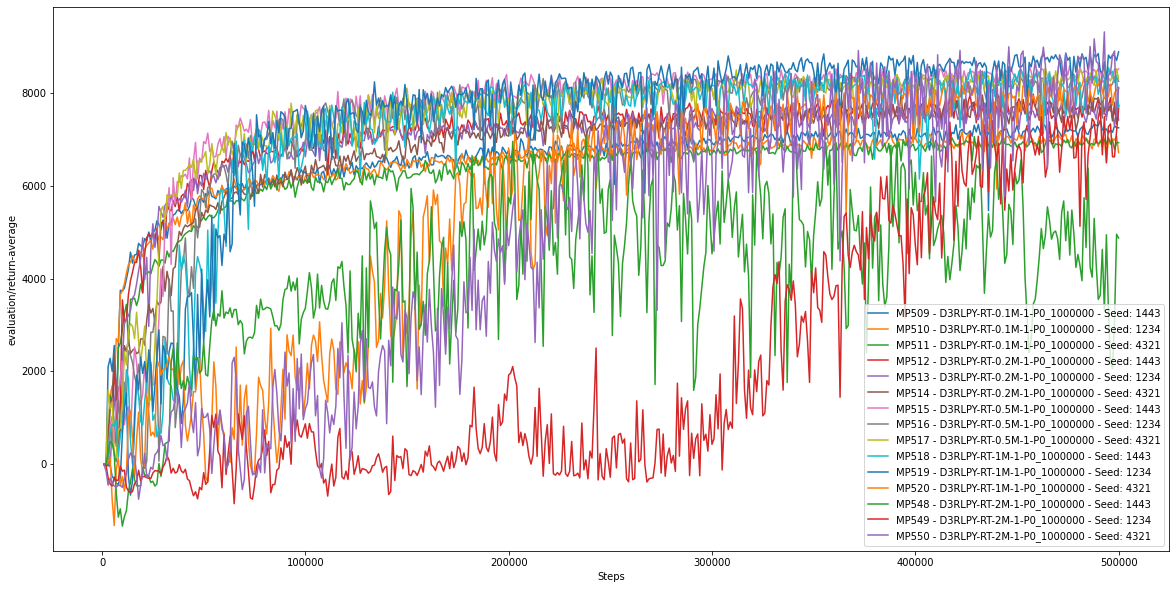

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    MP509,
    MP510,
    MP511,
    MP512,
    MP513,
    MP514,
    MP515,
    MP516,
    MP517,
    MP518,
    MP519,
    MP520,
    MP548,
    MP549,
    MP550,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

{'Steps: 0.1M': {'mean': 6961, 'std': 220},
 'Steps: 0.2M': {'mean': 7622, 'std': 148},
 'Steps: 0.5M': {'mean': 8354, 'std': 116},
 'Steps: 1M': {'mean': 8219, 'std': 500},
 'Steps: 2M': {'mean': 6879, 'std': 1431}}

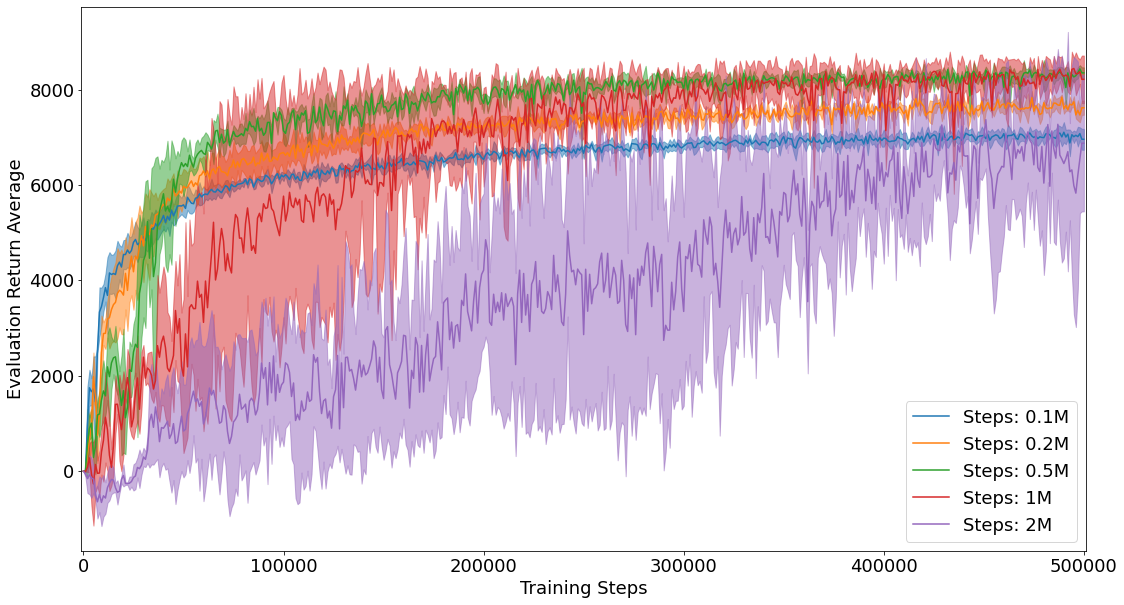

In [13]:
plot_grouped_evaluation_returns([
    ((MP509, MP510, MP511), 'Steps: 0.1M'),
    ((MP512, MP513, MP514), 'Steps: 0.2M'),
    ((MP515, MP516, MP517), 'Steps: 0.5M'),
    ((MP518, MP519, MP520), 'Steps: 1M'),
    ((MP548, MP549, MP550), 'Steps: 2M'),
], loc='lower right', save_path='ch4/d3rlpy_1M_records.png')

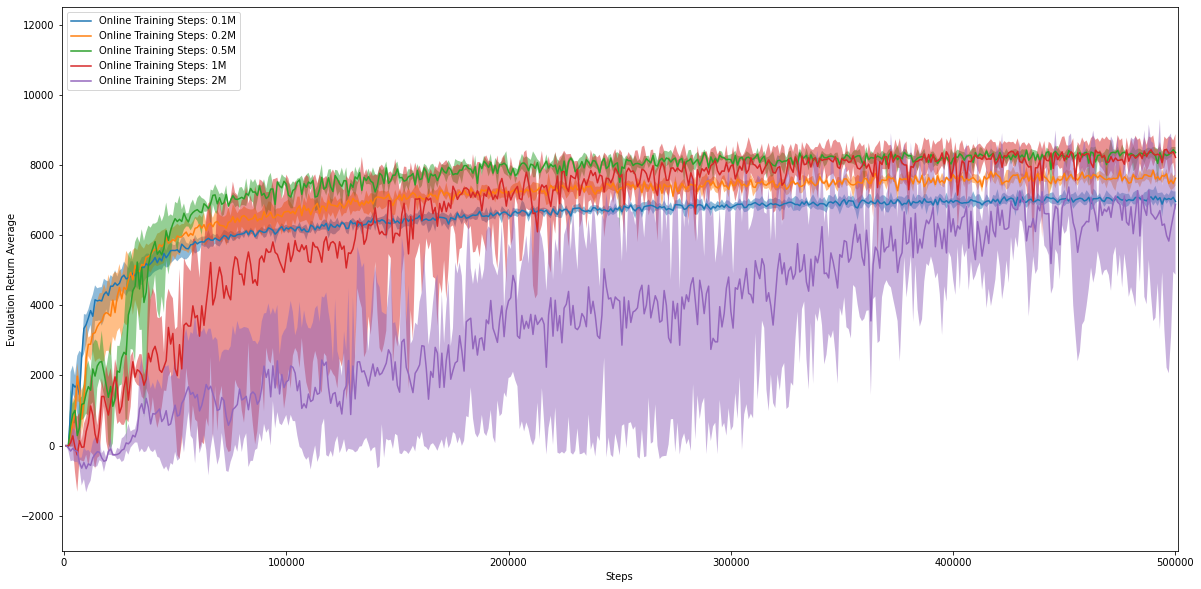

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

terminal_stats = {}
feature = 'evaluation/return-average'
for exp_set, steps in [
    ((MP509, MP510, MP511), '0.1'),
    ((MP512, MP513, MP514), '0.2'),
    ((MP515, MP516, MP517), '0.5'),
    ((MP518, MP519, MP520), '1'),
    ((MP548, MP549, MP550), '2'),
]:
    stacked_data = np.vstack([i.sac.result[feature] for i in exp_set])
    mean_vals = stacked_data.mean(axis=0)
    std_vals = stacked_data.std(axis=0)
    min_vals = stacked_data.min(axis=0)
    max_vals = stacked_data.max(axis=0)
    ax.plot(exp.sac.result['timesteps_total'], mean_vals, label=f'Online Training Steps: {steps}M')
    ax.fill_between(exp.sac.result['timesteps_total'], min_vals, max_vals, alpha=0.5)
    terminal_stats[exp_set[0].dataset] = {'mean': mean_vals[-1], 'std': std_vals[-1], 'text ': f'{mean_vals[-1]:.0f}±{std_vals[-1]:.0f}'}
ax.set_xlabel('Steps')
ax.set_ylabel('Evaluation Return Average')
ax.set_xlim(-1000,501000)
ax.set_ylim(-3000,12500)
ax.legend(loc='upper left')
pass

In [10]:
terminal_stats

{'D3RLPY-RT-0.1M-1-P0_1000000': {'mean': 6961.39892578125,
  'std': 219.86097166401444,
  'text ': '6961±220'},
 'D3RLPY-RT-0.2M-1-P0_1000000': {'mean': 7622.24462890625,
  'std': 147.74678079666418,
  'text ': '7622±148'},
 'D3RLPY-RT-0.5M-1-P0_1000000': {'mean': 8354.2890625,
  'std': 115.87005537471214,
  'text ': '8354±116'},
 'D3RLPY-RT-1M-1-P0_1000000': {'mean': 8218.500651041666,
  'std': 499.6450006791154,
  'text ': '8219±500'},
 'D3RLPY-RT-2M-1-P0_1000000': {'mean': 6879.323079427083,
  'std': 1431.0997862911597,
  'text ': '6879±1431'}}

## MBPO

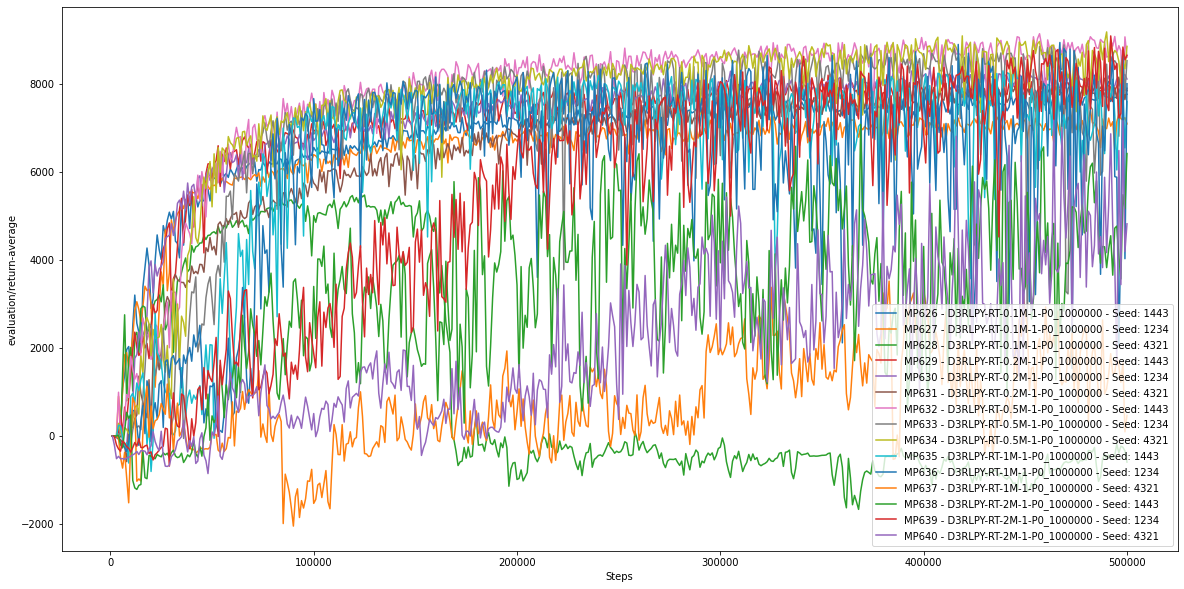

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    MP626,
    MP627,
    MP628,
    MP629,
    MP630,
    MP631,
    MP632,
    MP633,
    MP634,
    MP635,
    MP636,
    MP637,
    MP638,
    MP639,
    MP640,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

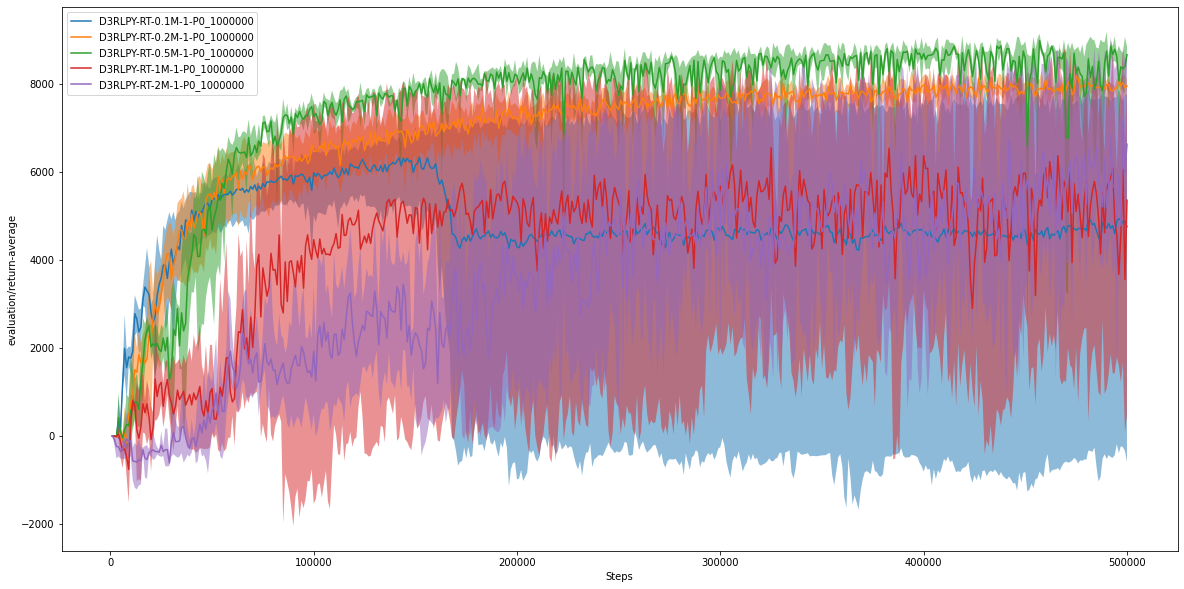

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp_set in [
    (MP626, MP627, MP628),
    (MP629, MP630, MP631),
    (MP632, MP633, MP634),
    (MP635, MP636, MP637),
    (MP638, MP639, MP640),
]:
    stacked_data = np.vstack([i.sac.result[feature] for i in exp_set])
    mean_vals = stacked_data.mean(axis=0)
    min_vals = stacked_data.min(axis=0)
    max_vals = stacked_data.max(axis=0)
    ax.plot(exp.sac.result['timesteps_total'], mean_vals, label=f'{exp_set[0].dataset}')
    ax.fill_between(exp.sac.result['timesteps_total'], min_vals, max_vals, alpha=0.5)
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass